In [2]:
# QGB layer 1 circuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi


Figure 3: A Quantum circuit analogue of the physical peg in figure 2. Qubit q2 is the input
channel or ‘ball’ and meters (measurements) indicate the output channels of the ‘quantum
peg’.

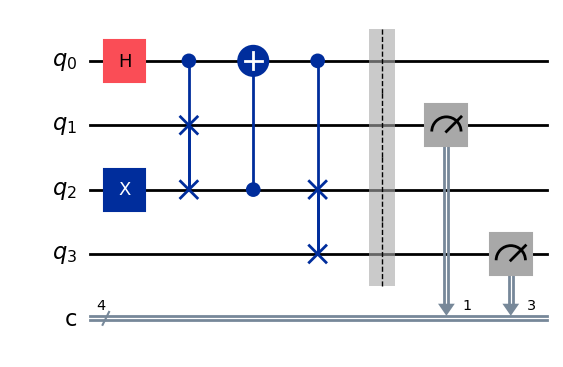

In [4]:

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[2])
circuit.cswap(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.cswap(qreg_q[0], qreg_q[2], qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[3], creg_c[3])

circuit.draw("mpl")

Figure 4: A Quantum circuit analogue of the physical peg in figure 2. A 3-peg (2 level) version of a QGB.

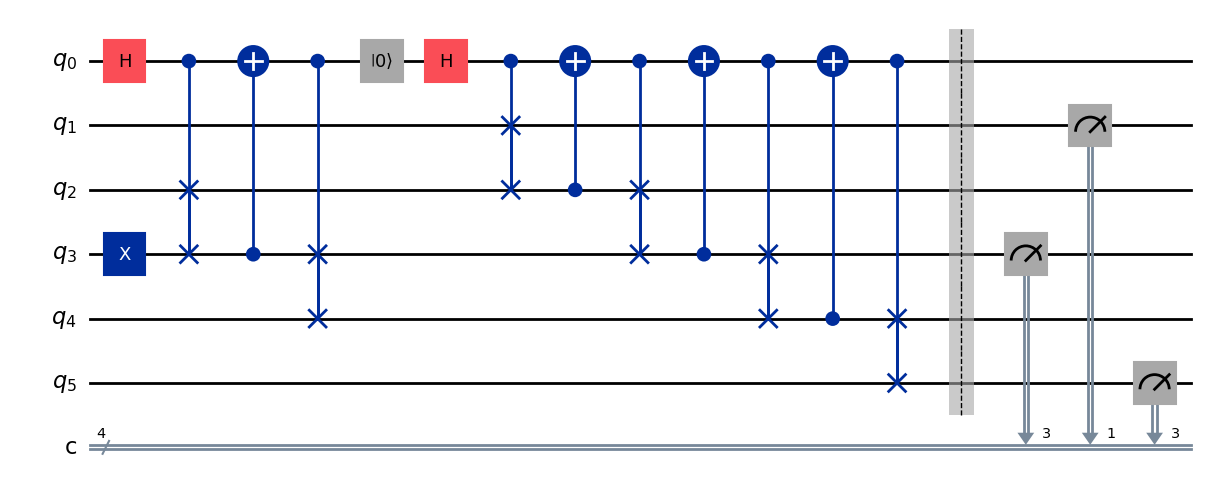

In [6]:
qreg_q1 = QuantumRegister(6, 'q')
creg_c1 = ClassicalRegister(4, 'c')
circuit1 = QuantumCircuit(qreg_q1, creg_c1)

circuit1.h(qreg_q1[0])
circuit1.x(qreg_q1[3])
circuit1.cswap(qreg_q1[0], qreg_q1[2], qreg_q1[3])
circuit1.cx(qreg_q1[3], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[3], qreg_q1[4])
circuit1.reset(qreg_q1[0])
circuit1.h(qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[1], qreg_q1[2])
circuit1.cx(qreg_q1[2], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[2], qreg_q1[3])
circuit1.cx(qreg_q1[3], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[3], qreg_q1[4])
circuit1.cx(qreg_q1[4], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[4], qreg_q1[5])
circuit1.barrier(qreg_q1[0], qreg_q1[1], qreg_q1[2], qreg_q1[3], qreg_q1[4], qreg_q1[5])
circuit1.measure(qreg_q1[3], creg_c1[3])
circuit1.measure(qreg_q1[1], creg_c1[1])
circuit1.measure(qreg_q1[5], creg_c1[3])

circuit1.draw("mpl")